In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


from abg_python.galaxy.gal_utils import Galaxy
from abg_python.all_utils import filterDictionary

from firestudio.studios.star_studio import StarStudio
matplotlib.rcParams['figure.dpi'] = 150

Create an abg_python$^\mathrm{TM}$ Galaxy instance

In [3]:
snapdir = "/scratch/projects/xsede/GalaxiesOnFIRE/metal_diffusion/m12i_res7100/output"
snapnum = 600 
galaxy = Galaxy(
    'm12i_res7100',
    snapdir,
    600,
    datadir='/scratch/04210/tg835099/data/metal_diffusion')

Couldn't find a metadata file... for
 Metadata object at /scratch/04210/tg835099/data/metal_diffusion/m12i_res7100/metadata/meta_Galaxy_600.hdf5


Locate the main halo, center our coordinates, and rotate to be face-on.

In [4]:
galaxy.extractMainHalo()

Using the saved sub-snapshots
Successfully loaded a pre-extracted subsnap
Reorienting...
Done.
extract_halo_inner(m12i_res7100_md at 600,){'orient_stars': True} 22.45 s elapsed
Snapshot memory free


(14.389217379832706,
 True,
 2.5881896910344975,
 -2.7838931910077562,
 35229529313569.195,
 44642473899919.32,
 268.00569800569804,
 2.877843475966541)

#### Let's make a simple image of "starlight" with "gas attenuation" to get an idea of what to expect

In [5]:
disk_mask = np.ones(galaxy.sub_star_snap['Masses'].size)
xs,ys,zs = galaxy.sub_star_snap['Coordinates'].T

disk_mask = (np.abs(xs) < 20) & (np.abs(ys) < 20) & (np.abs(zs) < 20)

In [6]:
gas_disk_mask = np.ones(galaxy.sub_snap['Masses'].size)
gas_xs,gas_ys,gas_zs = galaxy.sub_snap['Coordinates'].T

gas_disk_mask = (np.abs(gas_xs) < 20) & (np.abs(gas_ys) < 20) & (np.abs(gas_zs) < 20)

In [7]:
from matplotlib.colors import LinearSegmentedColormap
segments = np.zeros((100,4))
segments[:,-1] = np.linspace(0,1,100)
gas_cmap = LinearSegmentedColormap.from_list('black_alpha_gradient',segments)

13166037.834960938
1241674.9091796875


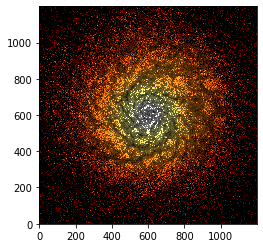

In [8]:
from matplotlib.colors import LogNorm
h_m,xedges,yedges = np.histogram2d(
    xs[disk_mask],
    ys[disk_mask],
    bins=1200,
    weights=galaxy.sub_star_snap['Masses'][disk_mask]*1e10)
print(h_m.max())

dA = np.diff(xedges)[0]
dA*=dA

plt.imshow((h_m.T+1e-12)/dA,norm=LogNorm(1e6,1e9),origin='lower',cmap='afmhot')
plt.gca().set_aspect(1)

from matplotlib.colors import LogNorm
h_m,xedges,yedges = np.histogram2d(
    gas_xs[gas_disk_mask],
    gas_ys[gas_disk_mask],
    bins=1200,
    weights=galaxy.sub_snap['Masses'][gas_disk_mask]*1e10)
print(h_m.max())

dA = np.diff(xedges)[0]
dA*=dA

plt.imshow((h_m.T)/dA,norm=LogNorm(1e5,1e9),origin='lower',cmap=gas_cmap)
plt.gca().set_aspect(1)
#plt.colorbar(label='M')

#### Now make a StarStudio instance

In [9]:
studio_datadir = os.path.join(os.path.dirname(galaxy.datadir),'firestudio')
print(studio_datadir)
my_starStudio = StarStudio(
    studio_datadir,
    galaxy.snapnum,
    galaxy.datadir_name,
    gas_snapdict=galaxy.sub_snap,
    star_snapdict=galaxy.sub_star_snap,
    )

/scratch/04210/tg835099/data/metal_diffusion/firestudio
setting maxden to default value of: 0.01
setting dynrange to default value of: 100.0
setting color_scheme_nasa to default value of: True
setting snapnum to user value of: 600
setting sim_name to user value of: m12i_res7100
setting frame_half_width to default value of: 15
setting frame_half_thickness to default value of: 15
setting frame_center to default value of: [0. 0. 0.]
setting theta to default value of: 0
setting phi to default value of: 0
setting psi to default value of: 0
setting aspect_ratio to default value of: 1
setting pixels to default value of: 1200
setting figure_label to default value of: 
setting scale_bar to default value of: True
setting scale_line_length to default value of: 5
setting noaxis to default value of: True
setting savefig to default value of: None
setting fontsize to default value of: 12
setting snapdir to default value of: None


setting maxden to user value of: 0.01
setting dynrange to user value of: 100.0
setting color_scheme_nasa to user value of: False
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxnorm ==  0.01  dynrange ==  100.0  minnorm ==  0.0001


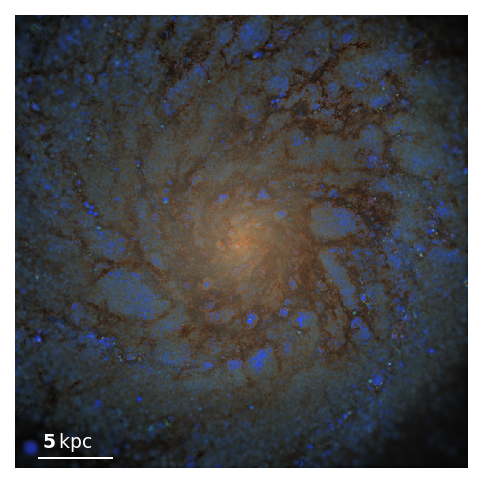

In [159]:
plt.figure()
my_starStudio.set_ImageParams(maxden=1e-2, dynrange=1e2, color_scheme_nasa=False)
pixels = my_starStudio.render(plt.gca())

In [15]:
"%.2g"%np.sqrt(10)

'3.2'

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.01  dynrange ==  100.0  minden ==  0.0001
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.0031622776601683794  dynrange ==  100.0  minden ==  3.1622776601683795e-05
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.001  dynrange ==  100.0  minden ==  1e-05
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.000316227766016838  dynrange ==  100.0  minden ==  3.16227766016838e-06
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00

(<Figure size 1152x1152 with 16 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2ac9a40da080>,
       dtype=object))

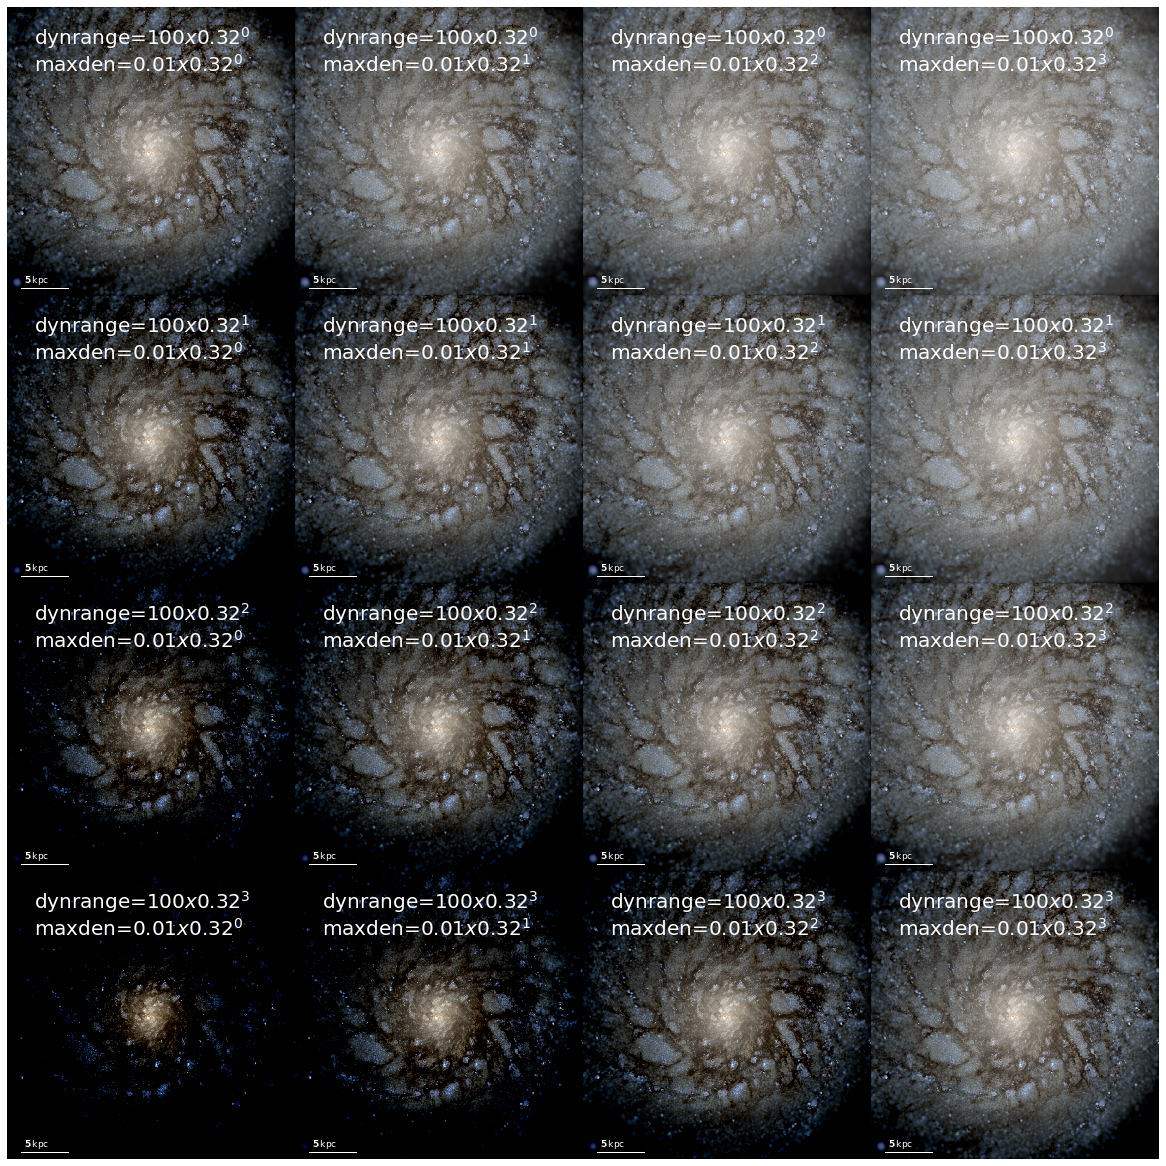

setting maxden to user value of: 0.01
setting dynrange to user value of: 100
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.01  dynrange ==  100  minden ==  0.0001


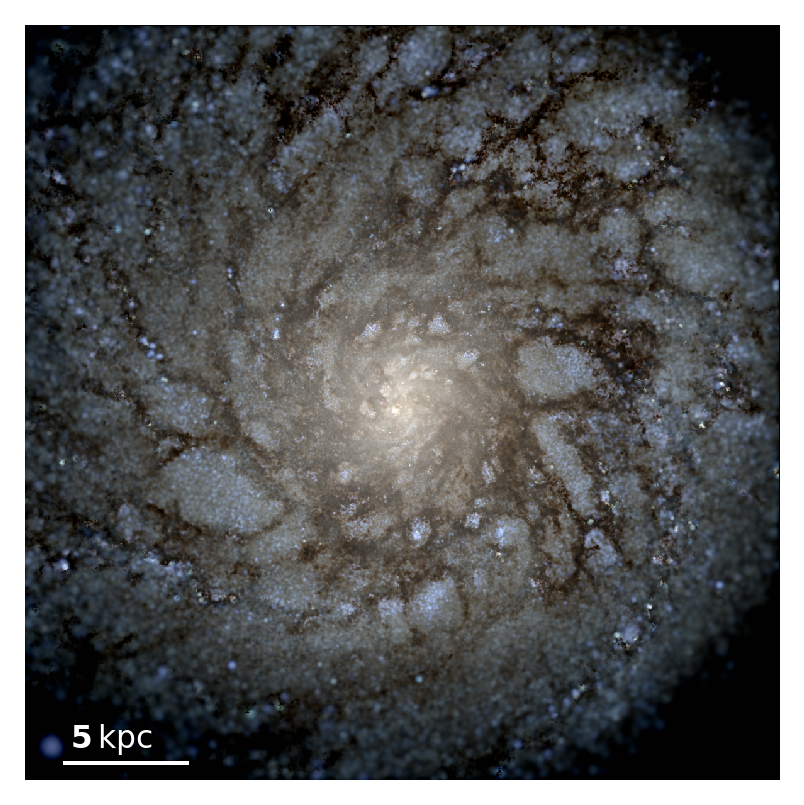

In [55]:
my_starStudio.set_ImageParams(maxden=0.014,dynrange=117)
my_starStudio.render()
plt.gcf().set_dpi(250)

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
0.01334855940755008 115.028274592047


/home1/04210/tg835099/python/firestudio/studios/star_studio.py:295: RuntimeWarning: divide by zero encountered in log10
  rats = rats[np.isfinite(rats)]


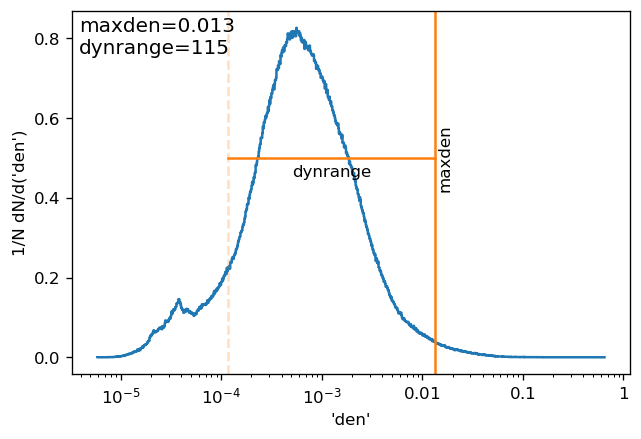

In [91]:
maxden,dynrange = my_starStudio.predictParameters(left_percentile=0.1,right_percentile=.99,ax=plt.gca())
print(maxden,dynrange)

In [90]:
from abg_python.plot_utils import nameAxes

cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.01  dynrange ==  100.0  minden ==  0.0001
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.0031622776601683794  dynrange ==  100.0  minden ==  3.1622776601683795e-05
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.001  dynrange ==  100.0  minden ==  1e-05
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00 compute_mockHubbleImage(StarStudio instance,){} success!
maxden ==  0.000316227766016838  dynrange ==  100.0  minden ==  3.16227766016838e-06
cache npix1200_width30.00kpc_depth15.00kpc_x0.00_y0.00_z0.00_theta0.00_phi0.00_psi0.00_aspect1.00

NameError: name 'fig' is not defined

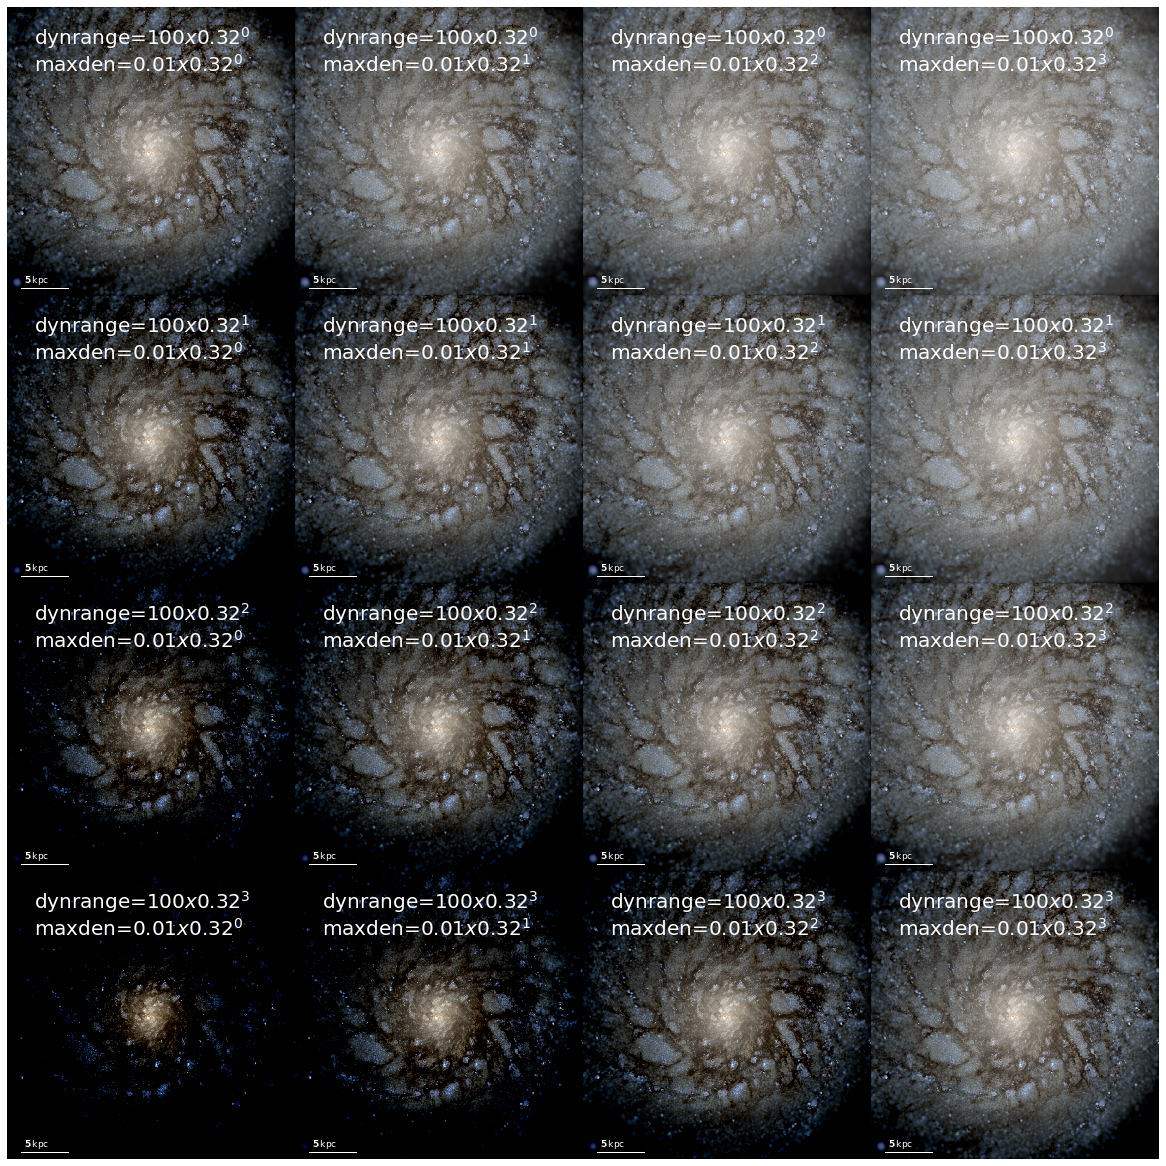

In [17]:
my_starStudio.plotParameterGrid()
fig.savefig('../src/hubble_grid.pdf',pad_inches=0,bbox_inches='tight')

In [ ]:
my_starStudio.plotParameterGrid(use_colorscheme_nasa=False)
fig.savefig('../src/sdss_grid.pdf',pad_inches=0,bbox_inches='tight')